In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm
%matplotlib notebook

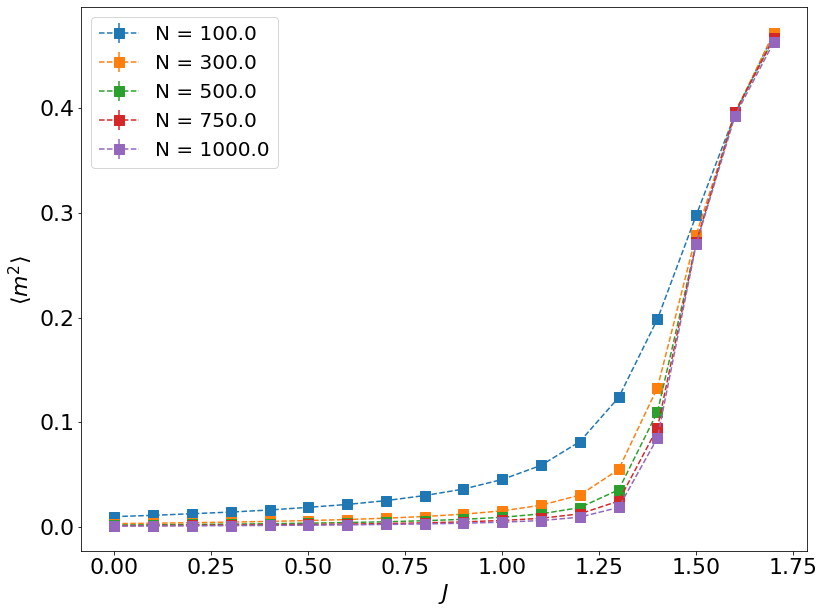

In [2]:
data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    
    bc = data_l[:,17]
    errs = data_l[:,18]
    #errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    #errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)

<IPython.core.display.Javascript object>


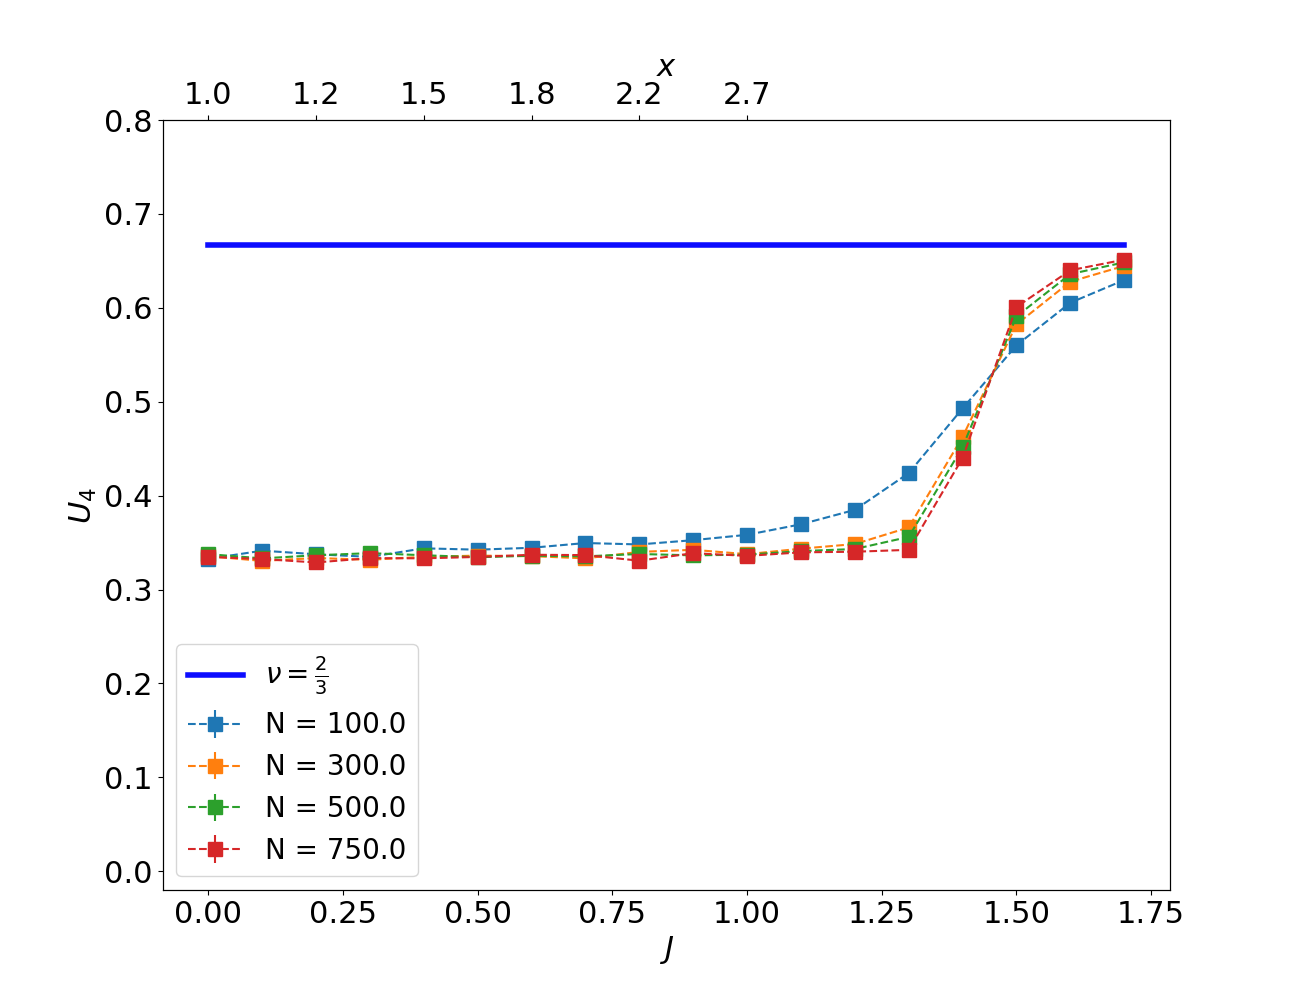

[0.0100416 0.0112751 0.0128238 0.0143838 0.0163707 0.0189163 0.0216603
 0.0253083 0.0301903 0.0363551 0.0455381 0.0590099 0.0817258 0.123844
 0.198693  0.297995  0.394581  0.47189  ]
[0.33265056 0.34134826 0.33753055 0.33474534 0.34384781 0.34242416
 0.34444532 0.34950279 0.34799797 0.3525452  0.35825428 0.36944174
 0.38479295 0.42394821 0.49281948 0.56003133 0.60542088 0.62956438]
[0.0033293  0.00375289 0.00425602 0.0048237  0.0054825  0.00629754
 0.00727184 0.00854273 0.0101587  0.012395   0.0155444  0.0209078
 0.0306194  0.0550766  0.133229   0.279155   0.395532   0.472005  ]
[0.33552795 0.33046408 0.33352863 0.33167388 0.33480841 0.33608277
 0.33553528 0.33318019 0.34005939 0.3422875  0.33761917 0.34348898
 0.34841001 0.36607004 0.46249476 0.58233365 0.62780238 0.64465586]
[0.00200181 0.00224603 0.00254282 0.00289461 0.00327813 0.00380137
 0.00440089 0.00511525 0.00613728 0.00746569 0.00941549 0.0126634
 0.0186958  0.0356829  0.109993   0.271013   0.396156   0.467287  ]
[0.33767352

[Text(0.0, 1, '1.0'),
 Text(0.2, 1, '1.2'),
 Text(0.4, 1, '1.5'),
 Text(0.6, 1, '1.8'),
 Text(0.8, 1, '2.2'),
 Text(1.0, 1, '2.7')]

In [4]:
data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.txt", skiprows=1)


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if l==10000: continue
        
    if l==1000: continue
        
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]    
    
    
    J_l = data_l[:, 1]
    
    #print(bc)
    print(data_l[:,17])
    
    bc = 1 - data_l[:,19]/3/data_l[:,17]/data_l[:,17]
    print(bc)
  
    errs = (2*data_l[:,18] / data_l[:,17])**2 + (data_l[:,20] /data_l[:,19])
    errs=0*np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.8)



plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,11,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )



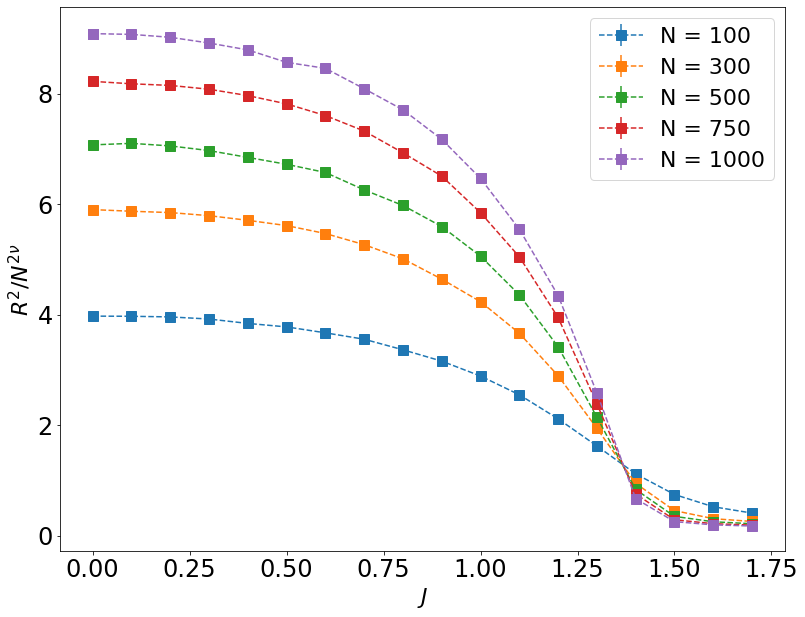

In [4]:
data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

for l in lengths:
    if (l==10000):
        continue
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
 
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.xlim(0.76, 0.9)
#plt.ylim(0.1, 4.5)

plt.legend(fontsize=22)

#plt.grid()

#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")

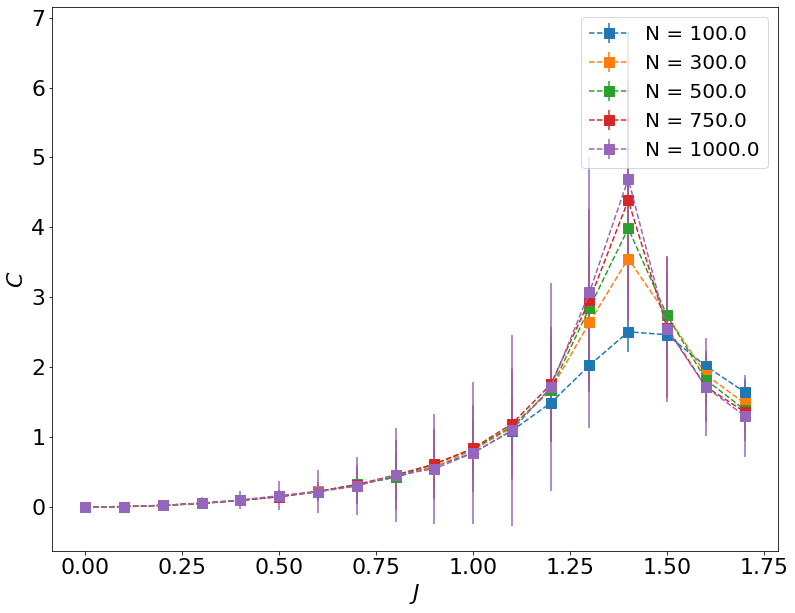

In [5]:
data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.txt", skiprows=1)

lengths = np.unique(data_np[:, 0])

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

 
for l in lengths:
    if (l==10000):
        continue
     
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    
    J_l = data_l[:, 1]
    
    bc = []
    errs=[]
    
    for j in range(len(J_l)):
        e1 = norm.rvs(data_l[j, 7], data_l[j, 8], size = 1000)
        e2 = norm.rvs(data_l[j, 9], data_l[j, 10], size = 1000)
    
        cum = (e2 - e1*e1)*np.square(J_l[j])*l
        mean = np.mean(cum)
        
        err=np.std(cum)#/np.sqrt(len(cum))
        
        bc.append(mean)
        errs.append(err)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)